# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [197]:
#importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [199]:
#Carregar dataset sinasc_RO_2019
sinasc = pd.read_csv('b1abb33c4f.csv')

#Verificar dados
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [201]:
# Função para categorizar os valores
def categorizar_apgar5(valor):
    if valor <= 3:
        return 'asfixia grave'
    elif valor <= 5:
        return 'asfixia moderada'
    elif valor <= 7:
        return 'asfixia leve'
    else:
        return 'normal'

# Aplicar a função à coluna "valor" e criar a coluna "categoria"
sinasc['APGAR5_CAT'] = sinasc['APGAR5'].apply(categorizar_apgar5)

sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,APGAR5_CAT
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

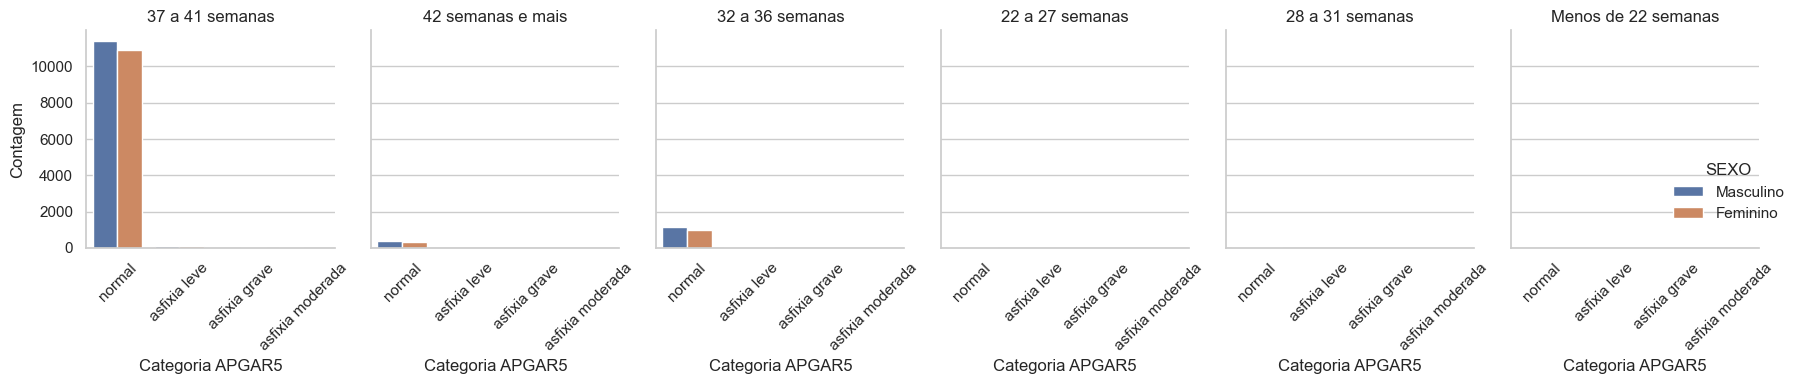

In [203]:
sns.set(style="whitegrid")

# Gráfico de contagem para comparar a distribuição de APGAR5 categorizado por sexo e tempo de gestação
g = sns.catplot(
       x='APGAR5_CAT',
       hue='SEXO',
       col='GESTACAO',
       data=sinasc,
       kind='count',
       height=4,
       aspect=0.7
   )

# Ajustar rótulos do eixo x para todos os gráficos
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)


g.set_axis_labels("Categoria APGAR5", "Contagem")
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [205]:
freq = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5_CAT'])
freq

APGAR5_CAT,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,21,12,1,52
28 a 31 semanas,3,18,12,132
32 a 36 semanas,8,73,19,2149
37 a 41 semanas,33,196,28,22332
42 semanas e mais,1,6,1,692
Menos de 22 semanas,2,1,0,4


####  5) Da tabela cruzada do item anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [207]:
freq_pctlin = freq.div(freq.sum(axis=1), axis=0) 
freq_pctlin

APGAR5_CAT,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,0.244186,0.139535,0.011628,0.604651
28 a 31 semanas,0.018182,0.109091,0.072727,0.800000
32 a 36 semanas,0.003557,0.032459,0.008448,0.955536
37 a 41 semanas,0.001461,0.008677,0.001240,0.988623
42 semanas e mais,0.001429,0.008571,0.001429,0.988571
Menos de 22 semanas,0.285714,0.142857,0.000000,0.571429


In [209]:
freq_pctlin.sum(axis=1)

GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Menos de 22 semanas    1.0
dtype: float64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

É possível inferir com base no gráfico abaixo que bebês nascidos com menos de 37 semanas começam a apresentar maiores riscos de asfixia quando comparado aos que nasceram com 37 semanas ou mais, sendo que quanto menos semanas maior o número de bebês que nasceram com quadros de asfixia grave.

<Axes: xlabel='GESTACAO'>

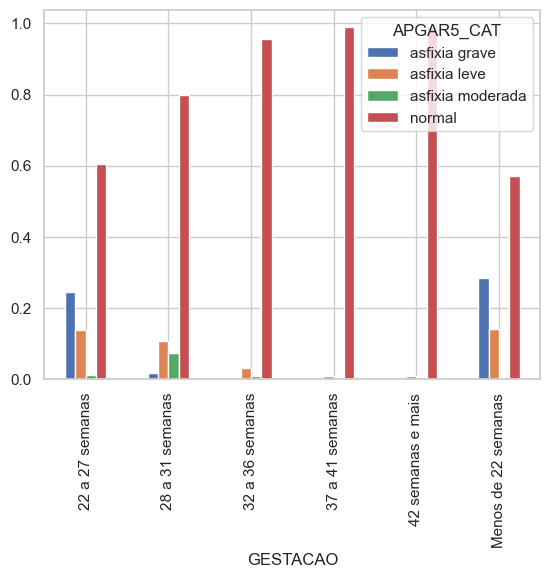

In [211]:
freq_pctlin.plot.bar()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

Por meio do boxplot apresentou a melhor visualização para avaliar as variáveis peso e apgar5 categorizado. Com isso vimos que não existe diferença estatística de acordo com a distribuição dos dados. Existe uma variação grande entre as categorias da variável APGAR5, logo outros fatores possam apresentar uma relação maior com o Peso do que o APGAR5.

<Axes: xlabel='APGAR5_CAT', ylabel='PESO'>

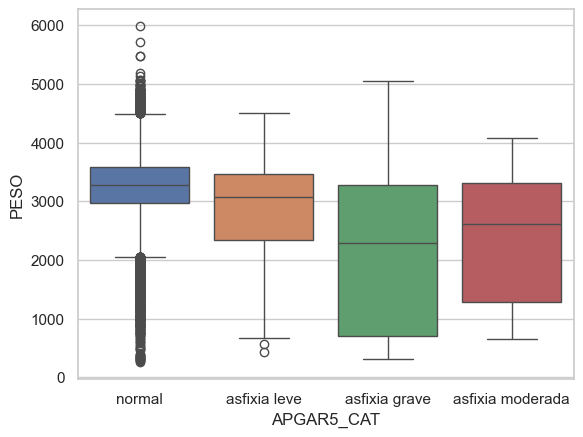

In [213]:
sns.boxplot(x='APGAR5_CAT', y = 'PESO', data = sinasc, hue= 'APGAR5_CAT')

<Axes: xlabel='APGAR5_CAT', ylabel='PESO'>

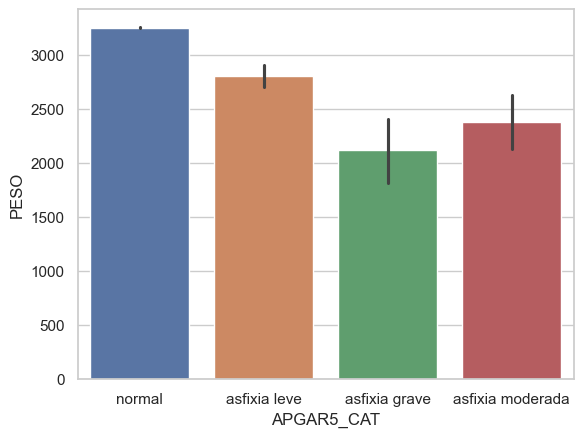

In [215]:
sns.barplot(x='APGAR5_CAT', y = 'PESO', data = sinasc, hue= 'APGAR5_CAT')